In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df21217_21220=pd.read_hdf("/data/user/jhellrung/NNMFit/datasets/ds21217_ds21220/baseline/dataset_ds21217_ds21220.hdf")
df21002=pd.read_hdf("/data/user/jhellrung/NNMFit/datasets/ds21002_ds21124_gal/baseline/dataset_ds21002_ds21124_galactic.hdf")
df21047=pd.read_hdf("/data/user/jhellrung/NNMFit/datasets/ds21047/baseline/dataset_ds21047.hdf")
df21217=pd.read_hdf("/data/user/jhellrung/NNMFit/datasets/ds21217/baseline/dataset_ds21217.hdf")



In [4]:
df21217.keys()

Index(['reco_dir_fit_status', 'reco_dir_exists', 'zenith_MPEFit',
       'azimuth_MPEFit', 'mjd_time_start_mjd', 'event_id',
       'energy_truncated_fit_status', 'energy_truncated',
       'energy_truncated_exists', 'energy_muex', 'TIntProbW', 'SubEvent',
       'MCPrimaryType', 'Run', 'MCPrimaryAzimuth', 'MCPrimaryEnergy',
       'MCPrimaryZenith', 'Event', 'MCType', 'ra_MPEFit', 'dec_MPEFit',
       'lon_MPEFit', 'lat_MPEFit', 'MCPrimaryRA', 'MCPrimaryDec',
       'MCPrimaryLon', 'MCPrimaryLat', 'powerlaw', 'mceq_conv_H4a_SIBYLL23c',
       'mceq_conv_GST4_SIBYLL23c', 'barr_h_mceq_H4a_SIBYLL23c',
       'barr_w_mceq_H4a_SIBYLL23c', 'barr_y_mceq_H4a_SIBYLL23c',
       'barr_z_mceq_H4a_SIBYLL23c', 'mceq_pr_H4a_SIBYLL23c',
       'mceq_pr_GST4_SIBYLL23c', 'barr_h_mceq_pr_H4a_SIBYLL23c',
       'barr_w_mceq_pr_H4a_SIBYLL23c', 'barr_z_mceq_pr_H4a_SIBYLL23c',
       'barr_y_mceq_pr_H4a_SIBYLL23c', 'fluxless_weight'],
      dtype='object')

In [4]:
Ebins=np.logspace(2,7,51)

In [5]:
hist_217=np.histogram(df21217["energy_truncated"],weights=df21217["mceq_conv_H4a_SIBYLL23c"],bins=Ebins)[0]
hist_002=np.histogram(df21002["energy_truncated"],weights=df21002["mceq_conv_H4a_SIBYLL23c"],bins=Ebins)[0]
hist_047=np.histogram(df21047["energy_truncated"],weights=df21047["mceq_conv_H4a_SIBYLL23c"],bins=Ebins)[0]
hist_217_220=np.histogram(df21217_21220["energy_truncated"],weights=df21217_21220["mceq_conv_H4a_SIBYLL23c"],bins=Ebins)[0]


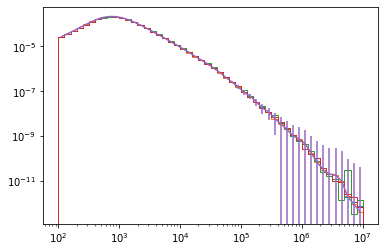

In [7]:
plt.stairs(hist_217,Ebins)
plt.stairs(hist_002,Ebins)
plt.stairs(hist_047,Ebins)
plt.stairs(hist_217_220,Ebins)
plt.errorbar(Ecenters,hist_002,yerr=np.sqrt(hist_002*257989333.37)/257989333.37)


plt.yscale("log")
plt.xscale("log")

In [6]:
Ecenters=np.empty(50)
for i in range(len(Ecenters)):
    Ecenters[i]=(Ebins[i]+Ebins[i+1])/2

Text(0.5, 0, 'E_reco in GeV')

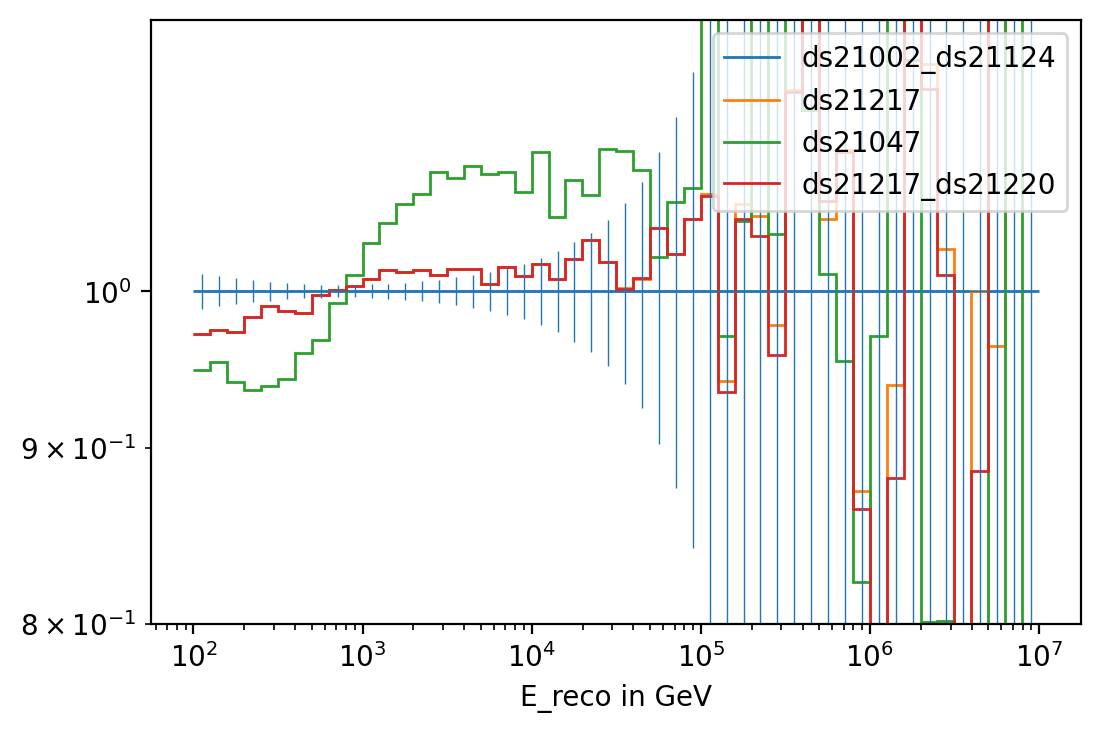

In [8]:
plt.figure(dpi=200,facecolor="white")
plt.stairs(hist_002/hist_002,Ebins,baseline=None,label="ds21002_ds21124")
plt.stairs(hist_217/hist_002,Ebins,baseline=None,label="ds21217")
plt.stairs(hist_047/hist_002,Ebins,baseline=None,label="ds21047")
plt.stairs(hist_217_220/hist_002,Ebins,baseline=None,label="ds21217_ds21220")

plt.errorbar(Ecenters,hist_002/hist_002,yerr=np.sqrt(hist_002*257989333.37)/257989333.37/hist_002,linewidth=0.5,color="tab:blue")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylim(0.8,1.2)
plt.xlabel("E_reco in GeV")